# Aula 5 - Exercícios - Gráficos
### Consulta a internet (Google, Stackoverflow e etc) liberada!!

In [1]:
# Importe a biblioteca pandas
import pandas as pd
import seaborn as sns
sns.set() # Ajusta valor padrão de tema, escala e paleta de cor


### 5.1 Plote um boxplot do índice de gini dos municípios brasileiros.
#### Veja o resultado esperado a seguir.


#### Dica: é necessário alguma manipulação dos dados antes de plotar o gráfico.
#### path_gini='../../curso_ciencia_dados2020/data/originais/gini/ginibr.csv'

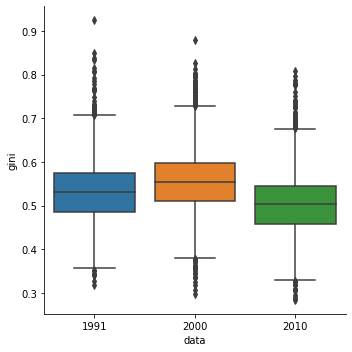

,cod_ibge6,variable,value
0,110001,1991,0.5983
1,110037,1991,NaN
2,110040,1991,NaN
3,110034,1991,0.5690
4,110002,1991,0.5827
...,...,...,...
16690,522200,2010,0.4672
16691,522205,2010,0.4824
16692,522220,2010,0.4935
16693,522230,2010,0.5240


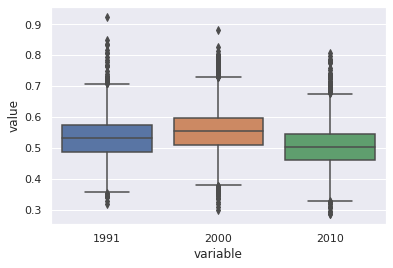

In [26]:
# YOUR CODE HERE
path_gini='../../curso_ciencia_dados2020/data/originais/gini/ginibr.csv'
df = pd.read_csv(path_gini,encoding="utf-8",sep=";",decimal=",",engine="python",header=2,skipfooter=2,na_values=["..."])
df["cod_ibge6"] = df['Município'].apply(lambda x : x[0:6])
df["Município"] = df['Município'].apply(lambda x : x[7:])
df = pd.melt(df, id_vars =['cod_ibge6'], value_vars =['1991', '2000','2010'])
ax = sns.boxplot(x='variable', y='value', data=df)
df

# raise NotImplementedError()

### 5.2 Plote um gráfico que mostre a evolução ao longo do tempo dos dados de curetagem do Estado de São Paulo.


#### Dica: Inspire-se no exercício quase igual a esse resolvido durante a aula 5. O que você precisa fazer a mais é filtrar os dados do Estado de São Paulo.
#### path_curetagem='../../curso_ciencia_dados2020/data/originais/curetagem/consolidado/curetagem2018.xlsx'


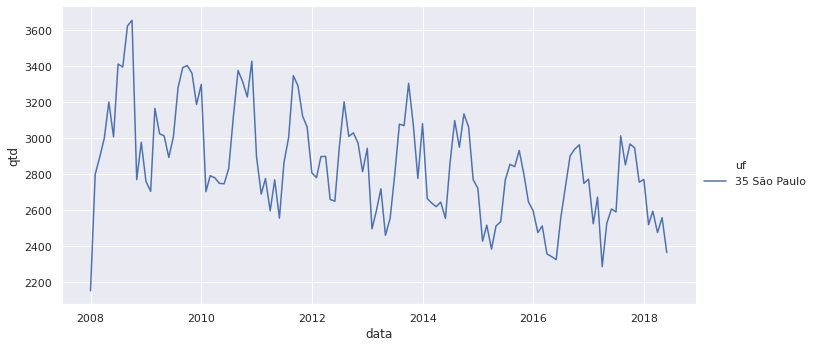

In [56]:
# YOUR CODE HERE
path_curetagem='../../curso_ciencia_dados2020/data/originais/curetagem/consolidado/curetagem2018.xlsx'
df = pd.read_excel(path_curetagem,na_values='-')
df.rename(columns={'Unidade da Federação': 'uf'}, inplace=True)
del df['Total']
df_melt = df.melt(id_vars=['uf'], var_name='data', value_name='qtd')
df_melt
from datetime import datetime
import locale
# Configure o locale para 'pt_BR.UTF-8'
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
# Crie uma coluna no dataframe df_unpivoted para guardar o valor do mês (de 1 a 12)
df_melt['mes'] = df_melt['data'].apply(lambda x: datetime.strptime(x, '%Y/%b').month)
# Crie uma coluna no dataframe df_unpivoted para guardar o valor do ano
df_melt['ano'] = df_melt['data'].apply(lambda x: datetime.strptime(x, '%Y/%b').year)
# Crie uma coluna no dataframe df_unpivoted para guardar a data (em formato datetime)
df_melt['data'] = df_melt['data'].apply(lambda x: datetime.strptime(x, '%Y/%b'))
# Converta a coluna qtd para float
df_melt['qtd'] = df_melt['qtd'].astype(float)
df_melt.set_index('uf')

sns.relplot(x="data", y="qtd", hue="uf", aspect=2,
            kind="line", data=df_melt.loc[df_melt['uf'] == "35 São Paulo"]);
# raise NotImplementedError()

### 5.3 Plote um gráfico boxplot do dataset tips como o da figura a seguir.


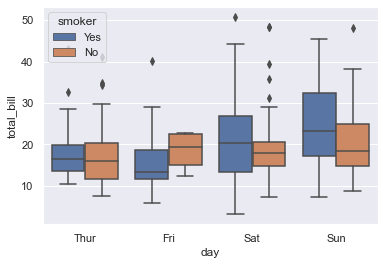

#### Sem dicas.

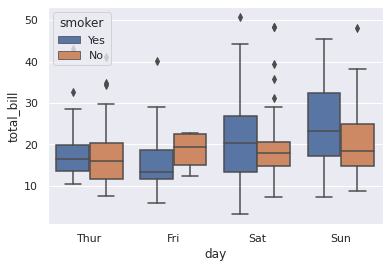

In [58]:
# YOUR CODE HERE
sns.set() 
tips = sns.load_dataset("tips") 
ax = sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips)
# raise NotImplementedError()

### 5.4 Plote um gráfico boxplot da coluna Valor_total de 5 municípios do dataset de Morbidade do Datasus. Os municípios a serem plotados são aqueles que obtiveram o maior custo médio diário de internação em todo o brasil. 
#### Esta métrica de custo médio diário de internação foi calculada no exercício 4.5 e 4.6. Use um argumento aspect=2 para o gráfico não sobrepor os nomes das cidades.


#### Dica: Antes de tentar plotar o gráfico, escreva algumas sentenças de código usando operações do pandas para encontrar quais são esses 5 municípios.
#### path_morbidade = '../../curso_ciencia_dados2020/data/originais/morbidade/consolidado/morbidade.csv'


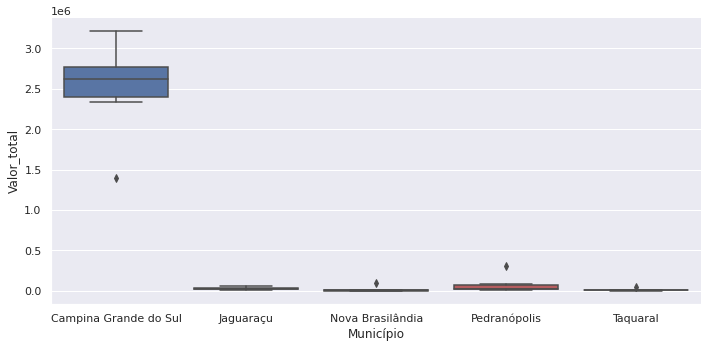

In [147]:
# YOUR CODE HERE
path_morbidade = '../../curso_ciencia_dados2020/data/originais/morbidade/consolidado/morbidade.csv'
df_morbidade = pd.read_csv(path_morbidade,encoding="utf-8",sep=";",decimal=",",engine="python",header=0,na_values=["-",""], dtype={"cod_ibge6":str})
df_agg = df_morbidade.groupby(["cod_ibge6","Município"]).agg({'Valor_total':'sum','Internações':'sum', 'Dias_permanência':'sum'})
df_agg['custo_medio_diario_intern'] = df_agg['Valor_total'] / df_agg['Dias_permanência']
df_agg.sort_values(['custo_medio_diario_intern'], ascending = [False], inplace = True)
df_agg = df_agg.head(5).reset_index()
sns.set()
merge  = df_morbidade.merge(df_agg['cod_ibge6'],  on = ['cod_ibge6']).sort_values(['Município'])
ax = sns.catplot(x='Município', y='Valor_total', data=merge, kind = 'box' ,aspect=2)
# raise NotImplementedError()

### 5.5 Faça o merge do dataset de morbidade com o dataset do índice de gini e plote um gráfico do tipo pairplot das seguintes variáveis (colunas): 'Internações',  'Óbitos', '2010' 



#### Dica: não tente plotar um pairplot de todas as variáveis, pois pode demorar bastante.
#### path_morbidade = '../../curso_ciencia_dados2020/data/originais/morbidade/consolidado/morbidade.csv'
#### path_gini = '../../curso_ciencia_dados2020/data/originais/gini/ginibr.csv'

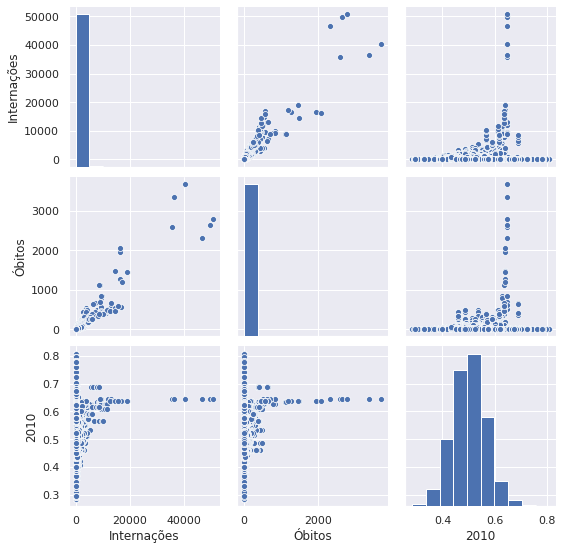

In [155]:
# YOUR CODE HERE
path_gini = '../../curso_ciencia_dados2020/data/originais/gini/ginibr.csv'
df = pd.read_csv(path_gini,encoding="utf-8",sep=";",decimal=",",engine="python",header=2,skipfooter=2,na_values=["..."])
df["cod_ibge6"] = df['Município'].apply(lambda x : x[0:6])
df["Município"] = df['Município'].apply(lambda x : x[7:])
path_morbidade = '../../curso_ciencia_dados2020/data/originais/morbidade/consolidado/morbidade.csv'
df_morbidade = pd.read_csv(path_morbidade,encoding="utf-8",sep=";",decimal=",",engine="python",header=0,na_values=["-",""], dtype={"cod_ibge6":str})
df_morbidade
merge  = df_morbidade.merge(df,  on = ['cod_ibge6'])
g = sns.pairplot(merge, vars=["Internações", "Óbitos", '2010'])
# raise NotImplementedError()